# Perkenalan 

## Nama : Dimas Furqon Prawimastoro

# Latar Belakang

Canadasalesdata.csv adalah suatu set data yang berisikan tentang penjualan mobil yang dihitung selama setahun, dari mulai tahun 2019 hingga tahun 2021. Dari data tersebut juga dipisahkan berdasarkan jenis merk mobil yang dipantau penjualannya per bulan. selain itu terdapat juga Kategori untuk jenis merk dari Mobil-mobil tersebut.

Adapun tujuan dari dataset ini adalah untuk melihat trend penjualan dari setiap jenis merk mobil yang bergerak setiap bulannya dalam rentang waktu 3 tahun, sehingga dari data tersebut dapat terlihat produk jenis merk mobil mana kah yang lebih unggul dari sisi penjualan dan dari sisi periode penjualan.

Dari data yang disajikan dapat diperoleh beberapa permasalahan yang akan ditelaah, antara lain : 
1. Analisis Total penjualan : digunakan untuk melihat agregasi total penjual berdasarkan merk
2. Analisis Trend : digunakan untuk melihat penjualan terbanyak maupun penjualan yang paling sedikit berdasarkan periode bulan atau tahun tertentu.
3. Analisis preferensi pengguna: digunakan untuk analisis untuk mengetahui preferensi pengguna terhadap merk mobil berdasarkan total penjualan
4. Analisis preferensi Kategori: digunakan untuk melihat preferensi terhadap kategori mobil
5. Analisis Kategori x Tahun : digunakan untuk melihat prefersi mobil pada tahun tertentu


# Penjelasan Kolom

# 1. Import Library dan Dataset

## 1.1. Import Library

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.2. Import Dataset

In [28]:
data1 = pd.read_csv('Canadasalesdata.csv')

In [29]:
data1

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sumofsales,Category,Year
0,Acura MDX,93,389,782,611,550,501,0,0,0,0,0,0,2926,MLS,2021
1,Audi Q7,210,210,236,303,292,303,0,0,0,0,0,0,1554,MLS,2021
2,Audi Q8,130,130,146,211,203,211,0,0,0,0,0,0,1031,MLS,2021
3,BMW X5,323,323,364,518,498,518,0,0,0,0,0,0,2544,MLS,2021
4,BMW X6,72,72,81,113,108,113,0,0,0,0,0,0,559,MLS,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Subaru Outback,499,621,948,1065,1079,981,1074,845,644,926,1184,1106,10972,MS,2019
232,Toyota 4Runner,605,393,784,762,854,681,824,903,522,690,663,549,8230,MS,2019
233,Toyota Highlander,729,792,1184,1095,1185,1423,1347,1336,1114,1366,1316,924,13811,MS,2019
234,Volkswagen Atlas,530,521,822,925,881,725,761,769,748,933,695,601,8911,MS,2019


# 2. Data Checking

In [30]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Model       236 non-null    object
 1   Jan         236 non-null    int64 
 2   Feb         236 non-null    int64 
 3   Mar         236 non-null    int64 
 4   Apr         236 non-null    int64 
 5   May         236 non-null    int64 
 6   Jun         236 non-null    int64 
 7   Jul         236 non-null    int64 
 8   Aug         236 non-null    int64 
 9   Sep         236 non-null    int64 
 10  Oct         236 non-null    int64 
 11  Nov         236 non-null    int64 
 12  Dec         236 non-null    int64 
 13  Sumofsales  236 non-null    int64 
 14  Category    236 non-null    object
 15  Year        236 non-null    int64 
dtypes: int64(14), object(2)
memory usage: 29.6+ KB


In [31]:
data1.isna().sum()

Model         0
Jan           0
Feb           0
Mar           0
Apr           0
May           0
Jun           0
Jul           0
Aug           0
Sep           0
Oct           0
Nov           0
Dec           0
Sumofsales    0
Category      0
Year          0
dtype: int64

Dapat terlihat bahwa tidak ada kolom yang memiliki 'missing values'

In [88]:
data1["Merek Mobil"]=data1["Model"].str.split().str[0]
data1

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sumofsales,Category,Year,Merek Mobil
0,Acura MDX,93,389,782,611,550,501,0,0,0,0,0,0,2926,MLS,2021,Acura
1,Audi Q7,210,210,236,303,292,303,0,0,0,0,0,0,1554,MLS,2021,Audi
2,Audi Q8,130,130,146,211,203,211,0,0,0,0,0,0,1031,MLS,2021,Audi
3,BMW X5,323,323,364,518,498,518,0,0,0,0,0,0,2544,MLS,2021,BMW
4,BMW X6,72,72,81,113,108,113,0,0,0,0,0,0,559,MLS,2021,BMW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Subaru Outback,499,621,948,1065,1079,981,1074,845,644,926,1184,1106,10972,MS,2019,Subaru
232,Toyota 4Runner,605,393,784,762,854,681,824,903,522,690,663,549,8230,MS,2019,Toyota
233,Toyota Highlander,729,792,1184,1095,1185,1423,1347,1336,1114,1366,1316,924,13811,MS,2019,Toyota
234,Volkswagen Atlas,530,521,822,925,881,725,761,769,748,933,695,601,8911,MS,2019,Volkswagen


In [91]:
data1["Merek Mobil"].unique()

array(['Acura', 'Audi', 'BMW', 'Cadillac', 'Genesis', 'Infiniti',
       'Jaguar', 'Land', 'Lexus', 'Lincoln', 'Maserati', 'Mercedes0Benz',
       'Porsche', 'Tesla', 'Volvo', 'Alfa', 'Toyota', 'Chevrolet', 'Ford',
       'GMC', 'Jeep', 'Nissan', 'Kia', 'Mazda', 'Subaru', 'Volkswagen',
       'Buick', 'Dodge', 'Honda', 'Hyundai'], dtype=object)

In [106]:
data2 = data1.groupby("Merek Mobil").agg(
    total penjualan = ("Sumofsales","sum"),
    total jan = ("Jan","sum"),
    total feb = ("Feb","sum"),
    total jan = ("Jan","sum"),
    ).reindex(['Acura', 'Audi', 'BMW', 'Cadillac', 'Genesis','Infiniti','Jaguar', 'Land', 'Lexus', 'Lincoln', 'Maserati', 'Mercedes0Benz','Porsche', 'Tesla', 'Volvo', 'Alfa', 'Toyota', 'Chevrolet', 'Ford','GMC', 'Jeep', 'Nissan', 'Kia', 'Mazda', 'Subaru', 'Volkswagen','Buick', 'Dodge', 'Honda', 'Hyundai'])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2129503206.py, line 2)

# 3. Analisis 

## 3.1 Analisis Total penjualan selama Setahun secara Agregat

In [89]:
### membuat baris total
datatotal = data1[['Model','Sumofsales','Category','Year']]

In [69]:
datatotal

,Model,Sumofsales,Category,Year
0,Acura MDX,2926,MLS,2021
1,Audi Q7,1554,MLS,2021
2,Audi Q8,1031,MLS,2021
3,BMW X5,2544,MLS,2021
4,BMW X6,559,MLS,2021
...,...,...,...,...
231,Subaru Outback,10972,MS,2019
232,Toyota 4Runner,8230,MS,2019
233,Toyota Highlander,13811,MS,2019
234,Volkswagen Atlas,8911,MS,2019


In [70]:
datatotal.describe()

,Sumofsales
count,236.000000
mean,3680.783898
std,4380.003782
min,2.000000
25%,925.750000
50%,2132.000000
75%,4257.250000
max,23185.000000


data 'year'masih terbaca data integer, oleh karena itu perlu di cast agar berubah ke tipe string

In [71]:
data1["Year"] = data1["Year"].astype(str)

In [72]:
datatotal["Year"] = datatotal["Year"].astype(str)

C:\Users\HAZIQ RAZZAN\AppData\Local\Temp\ipykernel_11384\1621098551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatotal["Year"] = datatotal["Year"].astype(str)


In [73]:
datatotal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Model       236 non-null    object
 1   Sumofsales  236 non-null    int64 
 2   Category    236 non-null    object
 3   Year        236 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.5+ KB


visualisasi data total penjualan 

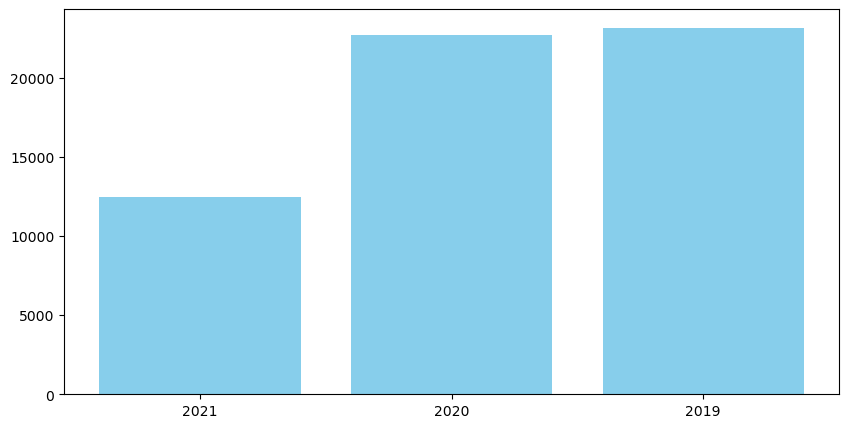

In [74]:
plt.figure(figsize=(10,5))
plt.bar(datatotal["Year"],datatotal["Sumofsales"], label= "Penjualan (unit)", color = 'skyblue')
plt.show()

In [77]:
datatotalasc = datatotal.sort_values(by="Year",ascending=True)
print(datatotalasc)

                          Model  Sumofsales Category  Year
117  Land Rover Discovery Sport        1076      SLS  2019
150       Mercedes0Benz G0Class        1272      LLS  2019
149           Lincoln Navigator        1644      LLS  2019
148                    Lexus LX        1053      LLS  2019
147      Land Rover Range Rover        1732      LLS  2019
..                          ...         ...      ...   ...
131           Lincoln Navigator         642      LLS  2021
130                    Lexus LX         297      LLS  2021
129      Land Rover Range Rover         775      LLS  2021
85                   Volvo XC60        1226      SLS  2021
0                     Acura MDX        2926      MLS  2021

[236 rows x 4 columns]


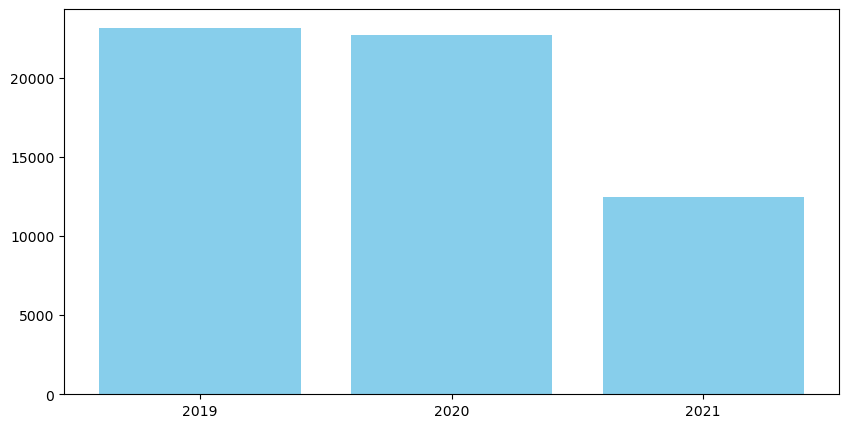

In [79]:
plt.figure(figsize=(10,5))
plt.bar(datatotalasc["Year"],datatotalasc["Sumofsales"], label= "Penjualan (unit)", color = 'skyblue')
plt.show()

Dapat dilihat bahwa dari data tersebut penjualan selama 3 tahun secara agregat mengalami penurunan, dan penurunan yang signifikan ada pada tahun 2020 ke 2021

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sumofsales,Category,Year,Merek Mobil
0,Acura MDX,93,389,782,611,550,501,0,0,0,0,0,0,2926,MLS,2021,Acura
1,Audi Q7,210,210,236,303,292,303,0,0,0,0,0,0,1554,MLS,2021,Audi
2,Audi Q8,130,130,146,211,203,211,0,0,0,0,0,0,1031,MLS,2021,Audi
3,BMW X5,323,323,364,518,498,518,0,0,0,0,0,0,2544,MLS,2021,BMW
4,BMW X6,72,72,81,113,108,113,0,0,0,0,0,0,559,MLS,2021,BMW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Subaru Outback,499,621,948,1065,1079,981,1074,845,644,926,1184,1106,10972,MS,2019,Subaru
232,Toyota 4Runner,605,393,784,762,854,681,824,903,522,690,663,549,8230,MS,2019,Toyota
233,Toyota Highlander,729,792,1184,1095,1185,1423,1347,1336,1114,1366,1316,924,13811,MS,2019,Toyota
234,Volkswagen Atlas,530,521,822,925,881,725,761,769,748,933,695,601,8911,MS,2019,Volkswagen


#### Pivot Tabel

In [85]:
dpivot = data1.pivot_table(index=['Model','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], values='Sumofsales', aggfunc='sum')
print(dpivot)

                                                                    Sumofsales
Model              Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec            
Acura MDX          93  389 782 611 550 501 0   0   0   0   0   0          2926
                   194 196 94  54  224 420 353 420 437 429 255 845        3921
Alfa Romeo Stelvio 23  30  18  16  36  37  62  55  59  51  42  58          487
                   25  17  40  46  38  38  32  36  72  31  26  57          916
                   42  42  48  59  57  59  0   0   0   0   0   0           307
...                                                                        ...
Volvo XC60         125 137 234 320 280 307 343 283 305 240 241 230        6090
                   149 162 72  94  208 219 400 355 385 372 306 426        3148
                   155 155 174 241 312 189 0   0   0   0   0   0          1226
Volvo XC90         138 153 66  85  190 199 264 235 254 272 223 310        2389
                   190 190 214 261 338 205 0   0   0

In [84]:
dpivot

Sumofsales
Model              Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec Category            
Acura MDX          93  389 782 611 550 501 0   0   0   0   0   0   MLS             2926
                   194 196 94  54  224 420 353 420 437 429 255 845 MLS             3921
Alfa Romeo Stelvio 23  30  18  16  36  37  62  55  59  51  42  58  SLS              487
                   25  17  40  46  38  38  32  36  72  31  26  57  MLS              458
                                                                   SLS              458
...                                                                                 ...
Volvo XC60         125 137 234 320 280 307 343 283 305 240 241 230 SLS             3045
                   149 162 72  94  208 219 400 355 385 372 306 426 SLS             3148
                   155 155 174 241 312 189 0   0   0   0   0   0   SLS             1226
Volvo XC90         138 153 66  85  190 199 264 235 254 272 223 310 MLS             2389
                   190 190 214 261 338 205 0   0   0   0   0   0   MLS             1398

[236 rows x 1 columns]